Diego Rosas A01634154

# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [3]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Dataset url
url = "datasets/iris/iris.csv"

# Load the dataset
dataset = pd.read_csv(url, names=['Largo sepal','Ancho sepal','Largo pétalo','Ancho pétalo','Especie'] )

In [4]:
dataset

,Largo sepal,Ancho sepal,Largo pétalo,Ancho pétalo,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


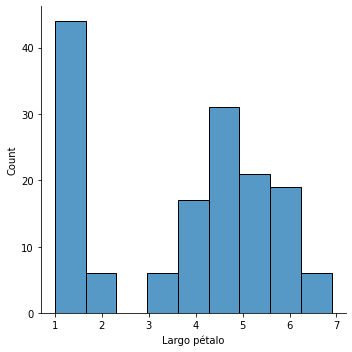

In [11]:
sns.displot(dataset["Largo pétalo"], kde = False)
plt.show()

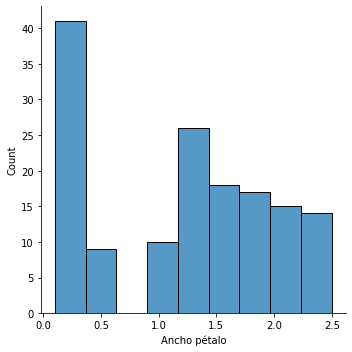

In [12]:
sns.displot(dataset["Ancho pétalo"], kde = False)
plt.show()

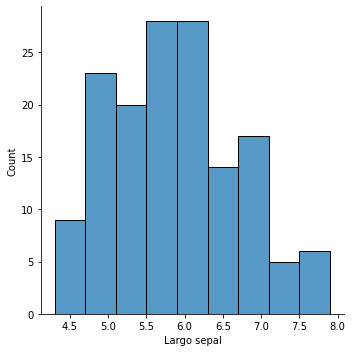

In [13]:
sns.displot(dataset["Largo sepal"], kde = False)
plt.show()

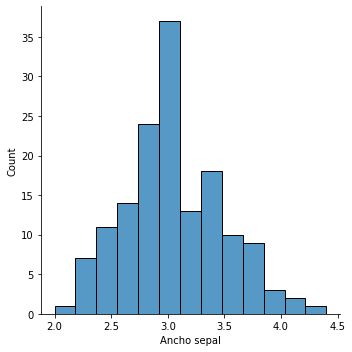

In [14]:
sns.displot(dataset["Ancho sepal"], kde = False)
plt.show()

/Users/diegorosas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


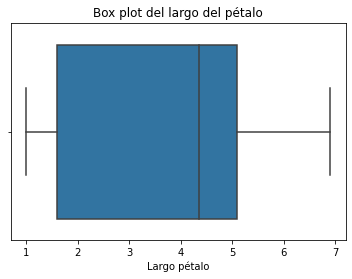

In [17]:
sns.boxplot(dataset["Largo pétalo"]).set_title("Box plot del largo del pétalo")
plt.show()

/Users/diegorosas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


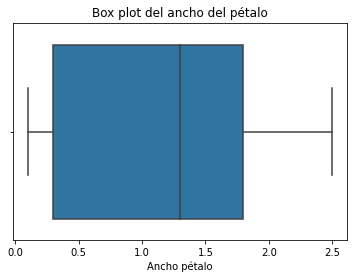

In [18]:
sns.boxplot(dataset["Ancho pétalo"]).set_title("Box plot del ancho del pétalo")
plt.show()

/Users/diegorosas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


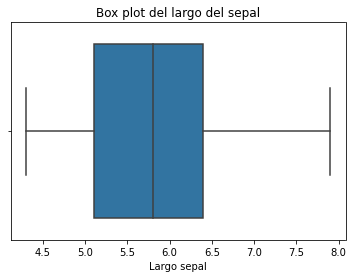

In [19]:
sns.boxplot(dataset["Largo sepal"]).set_title("Box plot del largo del sepal")
plt.show()

/Users/diegorosas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


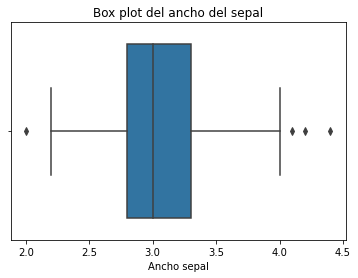

In [20]:
sns.boxplot(dataset["Ancho sepal"]).set_title("Box plot del ancho del sepal")
plt.show()

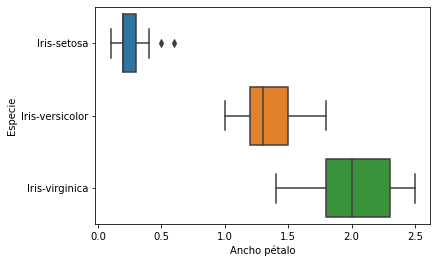

In [25]:
sns.boxplot(x = dataset["Ancho pétalo"], y = dataset["Especie"])
plt.show()

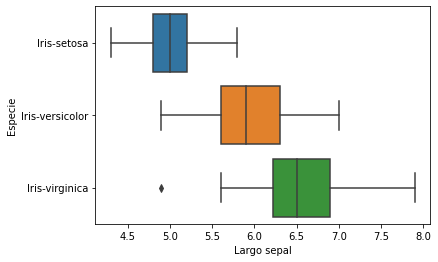

In [27]:
sns.boxplot(x = dataset["Largo sepal"], y = dataset["Especie"])
plt.show()

Se puede observar a partir de los histogramas que el largo del pétalo se encuentra la mayoría de las veces entre 1 y 1.5 y el ancho entre 0 y 0.25. En cuanto a los sepales, el largo se encuentra la mayoría de las veces entre 5.5 y 6.25 y el ancho alrededor de 3. En los boxplot podemos observar que al pétalo se encuentra entre 1.5 y 5 aproximadamente y el ancho entre 0.25 y 1.75 aproximadamente. En cuanto al sepal, este se encuentra entre 5 y 6.5 de largo y entre 2.75 y y 3.25. Finalmente podemos concluir que la iris-virginica tiene el pétalo más ancho, mientras que la iris-versociolor se encuentra en segundo lugar y la iris-setosa en último; en cuanto al largo del sepal, podemos observar que es directamente proporcional ya que la iris-virginica se encuentra en primer lugar, seguida de la iris-versicolor y la iris-setosa al igual que el caso anterior. 